In [35]:
import pylab as pl
import pandas as pd
from scipy.stats import binom

In [2]:
T=pd.read_csv(r'C:\Users\julia\Documents\python36\datasource\data\season-1819.csv')

cols = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG'] # Fixed typo and missing column names
T = T[cols] # Fixed typo in variable name

# Renamed columns using f-strings with proper formatting
T.rename(columns={'HomeTeam': 'DOM', 'AwayTeam': 'EXT', 'FTHG': 'BDOM', 'FTAG': 'BEXT'}, inplace=True)

print(T.head())

         Date          DOM       EXT  BDOM  BEXT
0  10/08/2018    Marseille  Toulouse     4     0
1  11/08/2018       Angers     Nimes     3     4
2  11/08/2018        Lille    Rennes     3     1
3  11/08/2018  Montpellier     Dijon     1     2
4  11/08/2018       Nantes    Monaco     1     3


In [3]:
print(len(T))

380


In [4]:
M = T['BDOM'].value_counts().sort_index()
M

0     88
1    127
2     99
3     43
4     14
5      8
9      1
Name: BDOM, dtype: int64

([<matplotlib.axis.XTick at 0x24ff0f7c730>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '9'),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

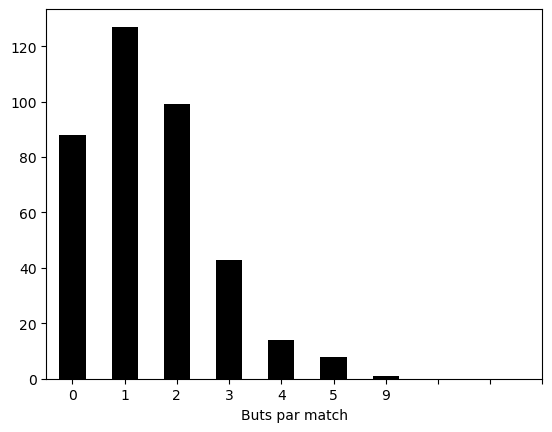

In [5]:
# Plotting the bar chart
M.plot.bar(color='black')
pl.xlabel('Buts par match')
pl.xticks(range(10), rotation=0)

In [6]:
# Mean number of goals per match scored by the home team
m = T.mean()
m

C:\Users\julia\AppData\Local\Temp\ipykernel_17528\2198374331.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  m = T.mean()


BDOM    1.471053
BEXT    1.086842
dtype: float64

In [7]:
# Second result of the table m
m['BDOM']

1.4710526315789474

# Random

In [8]:
X = binom(45, m['BDOM']/45)
E = [380 * X.pmf(k) for k in range(7)]
E

[85.16044125864528,
 129.50915300533373,
 96.2882270515444,
 46.64127750514823,
 16.550449085089646,
 4.586418506513136,
 1.0333143683940296]

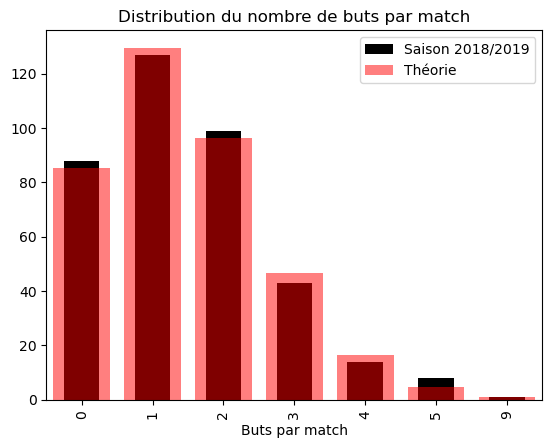

In [9]:
M.plot.bar(color='black')
pl.bar(range(7), E, color='red', alpha=0.5, label='Théorie')
pl.xlabel('Buts par match')
pl.legend(labels=['Saison 2018/2019', 'Théorie'])
pl.title("Distribution du nombre de buts par match")
pl.show()

# Step 2

In [10]:
TD = T.query('DOM == "Marseille"').mean()
TD

C:\Users\julia\AppData\Local\Temp\ipykernel_17528\2640204658.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  TD = T.query('DOM == "Marseille"').mean()


BDOM    1.631579
BEXT    0.894737
dtype: float64

In [11]:
TD['BDOM']/m['BDOM']


1.10912343470483

In [12]:
TD['BEXT']/m['BEXT']


0.8232445520581114

In [13]:
TE = T.query('EXT == "Toulouse"').mean()
TE

C:\Users\julia\AppData\Local\Temp\ipykernel_17528\3717343057.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  TE = T.query('EXT == "Toulouse"').mean()


BDOM    1.631579
BEXT    0.789474
dtype: float64

In [14]:
TE['BEXT']/m['BEXT']

0.7263922518159807

In [15]:
TE['BDOM']/m['BDOM']

1.10912343470483

In [16]:
(TD['BDOM'] / m['BDOM']) * (TE['BDOM'] / m['BDOM']) * m['BDOM']

1.809622446097354

In [17]:
(TD['BEXT'] / m['BEXT']) * (TE['BEXT'] / m['BEXT']) * m['BEXT']

0.6499299095195616

In [31]:
def Esp(e1, e2):
    TD = T.query('DOM == @e1').mean()
    TE = T.query('EXT == @e2').mean()
                 
    EX = TD['BDOM'] * TE['BDOM'] / m['BDOM']
    EY = TD['BEXT'] * TE['BEXT'] / m['BEXT']
    return EX, EY

In [32]:
m1, m2 = Esp('Marseille', 'Toulouse')
m1,m2

C:\Users\julia\AppData\Local\Temp\ipykernel_17528\1527962520.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  TD = T.query('DOM == @e1').mean()
C:\Users\julia\AppData\Local\Temp\ipykernel_17528\1527962520.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  TE = T.query('EXT == @e2').mean()


(1.809622446097354, 0.6499299095195616)

In [20]:
X = binom(45, m1/45)
Y = binom(45, m2/45)
s = 0
for i in range(7):
    s = s + X.pmf(i) * Y.pmf(i)
s


0.21820548533571824

# Simulation by match

In [21]:

for match in range(380):
    e1 = T.loc[match, 'DOM']
    e2 = T.loc[match, 'EXT']
    T.loc[match, 'EX'], T.loc[match, 'EY'] = Esp(e1, e2)

T.head()

C:\Users\julia\AppData\Local\Temp\ipykernel_17528\1527962520.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  TD = T.query('DOM == @e1').mean()
C:\Users\julia\AppData\Local\Temp\ipykernel_17528\1527962520.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  TE = T.query('EXT == @e2').mean()
C:\Users\julia\AppData\Local\Temp\ipykernel_17528\1527962520.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  TD = T.query('DOM == @e1').mean()
C:\Users\julia\AppData\Local\Temp\ipykernel_17528

,Date,DOM,EXT,BDOM,BEXT,EX,EY
0,10/08/2018,Marseille,Toulouse,4,0,1.809622,0.649930
1,11/08/2018,Angers,Nimes,3,4,1.717352,1.513954
2,11/08/2018,Lille,Rennes,3,1,2.689012,0.785013
3,11/08/2018,Montpellier,Dijon,1,2,1.809622,0.662674
4,11/08/2018,Nantes,Monaco,1,3,1.845401,1.162228


In [34]:
P_Off = {equipe : 0 for equipe in set(T['DOM'])}
P_Off

{'Nice': 0,
 'Angers': 0,
 'Bordeaux': 0,
 'Lyon': 0,
 'Toulouse': 0,
 'Reims': 0,
 'Lille': 0,
 'Amiens': 0,
 'Monaco': 0,
 'Guingamp': 0,
 'Montpellier': 0,
 'Nimes': 0,
 'Nantes': 0,
 'Paris SG': 0,
 'Caen': 0,
 'Rennes': 0,
 'Marseille': 0,
 'Strasbourg': 0,
 'St Etienne': 0,
 'Dijon': 0}

In [30]:
for e1, e2, x, y in zip(T['DOM'], T['EXT'], T['BDOM'], T['BEXT']):
    if x > y:
        P_Off[e1] = P_Off.get(e1, 0) + 3
    elif x == y:
        P_Off[e1] = P_Off.get(e1, 0) + 1
        P_Off[e2] = P_Off.get(e2, 0) + 1
    else:
        P_Off[e2] = P_Off.get(e2, 0) + 3

print(P_Off)

{'Nice': 168, 'Angers': 138, 'Bordeaux': 123, 'Lyon': 216, 'Toulouse': 114, 'Reims': 165, 'Lille': 225, 'Amiens': 114, 'Monaco': 108, 'Guingamp': 81, 'Montpellier': 177, 'Nimes': 159, 'Nantes': 144, 'Paris SG': 273, 'Caen': 99, 'Rennes': 156, 'Marseille': 183, 'Strasbourg': 147, 'St Etienne': 198, 'Dijon': 102}


# Simulation for 1 match of the goals scored

In [24]:
from random import random
from math import floor

def nb_buts(EX):
    X = 0
    for k in range(45):
        X = X + floor(random() + EX/45)
    return X

In [27]:
# Simulation de n = 20000 fois la saison 2018-2019
def simulation(n):
    P = {team: 0 for team in set(T['DOM'])}
    for k in range(n):
        for e1, e2, EX, EY in zip(T['DOM'], T['EXT'], T['EX'], T['EY']):
            
            x = nb_buts(EX)
            y = nb_buts(EY)
            
            if x > y:
                P[e1] = P[e1] + 3
            elif x == y:
                P[e1] = P[e1] + 1
                P[e2] = P[e2] + 1
            else:
                P[e2] = P[e2] + 3
                
    return {equipe: P[equipe] / n for equipe in P}

In [28]:
P_Sim = simulation(20000)
P_Sim

{'Nice': 47.56045,
 'Angers': 49.59545,
 'Bordeaux': 45.1841,
 'Lyon': 68.58285,
 'Toulouse': 37.7158,
 'Reims': 50.3854,
 'Lille': 76.0358,
 'Amiens': 37.57065,
 'Monaco': 39.89125,
 'Guingamp': 27.7137,
 'Montpellier': 60.5203,
 'Nimes': 54.48085,
 'Nantes': 51.5142,
 'Paris SG': 90.1775,
 'Caen': 34.27205,
 'Rennes': 56.50555,
 'Marseille': 60.09485,
 'Strasbourg': 59.9915,
 'St Etienne': 65.98205,
 'Dijon': 32.76365}